In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = './static/'

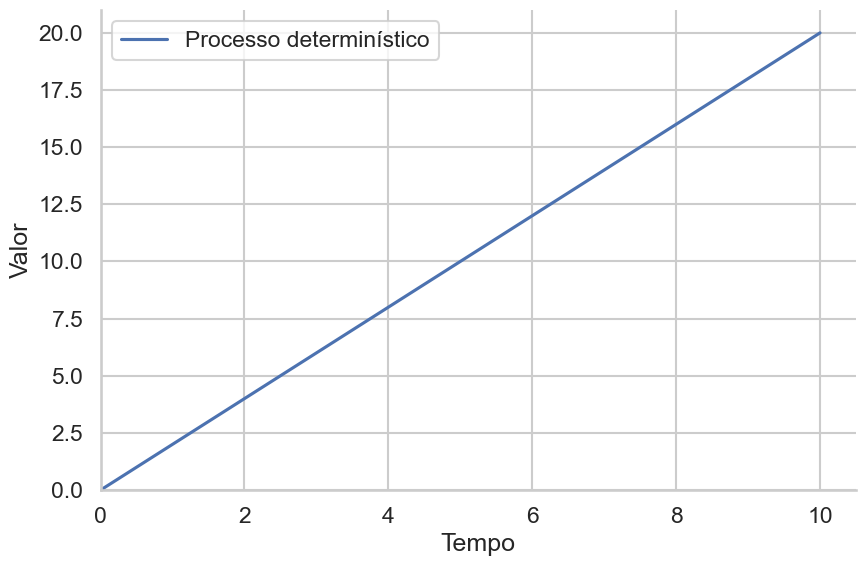

In [9]:


filename = 'determinístico'

# Define the time horizon
t = np.linspace(0, 10, 500)

# Deterministic process: simple linear growth
y_deterministic = 2 * t

# Set Seaborn style for presentations
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(9, 6))

# Plot deterministic process
sns.lineplot(x=t, y=y_deterministic, label='Processo determinístico')

plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.xlim(left=0)
plt.ylim(bottom=0)

# Remove top and right spines
sns.despine()

# Show the plots
plt.tight_layout()
plt.savefig(path + filename + '.svg', format="svg")
plt.show()



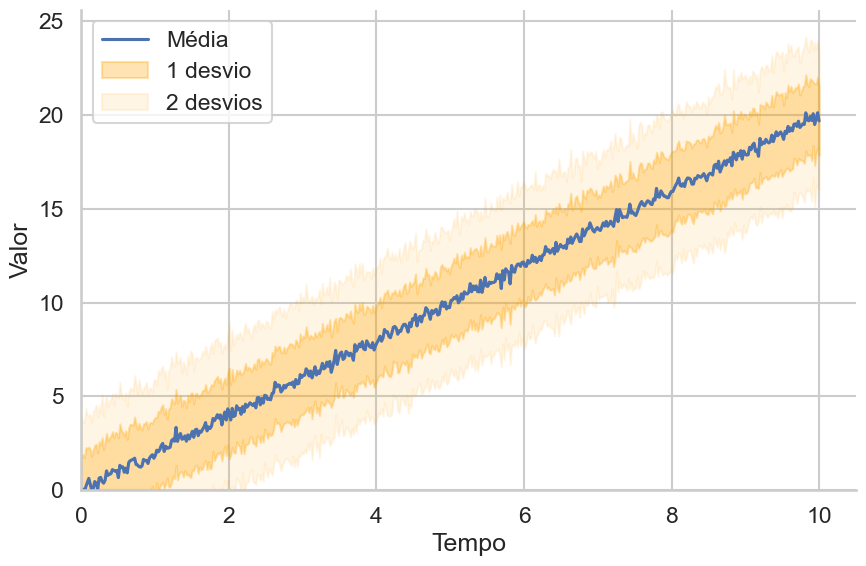

In [15]:


filename = 'estocástico'

# Define the time horizon
t = np.linspace(0, 10, 500)

# Deterministic process: simple linear growth
y_deterministic = 2 * t 

# Stochastic process: mean and standard deviation
mean_stochastic = 2 * t
std_dev = 2  # Increased the standard deviation for visibility

# Generate multiple realizations to estimate the range
num_realizations = 100  # Number of realizations for range estimation
realizations = []

for _ in range(num_realizations):
    noise = np.random.normal(0, std_dev, len(t))
    realizations.append(mean_stochastic + noise)

realizations = np.array(realizations)

# Compute the mean and confidence intervals (e.g., 1 and 2 standard deviations)
mean_realization = np.mean(realizations, axis=0)
std_realization = np.std(realizations, axis=0)

upper_bound_1std = mean_realization + std_realization
lower_bound_1std = mean_realization - std_realization
upper_bound_2std = mean_realization + 2 * std_realization
lower_bound_2std = mean_realization - 2 * std_realization

# Set Seaborn style for presentations
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(9, 6))

# Plot deterministic process
sns.lineplot(x=t, y=mean_realization, label='Média')

# Shaded region for 1 standard deviation (68% confidence interval)
plt.fill_between(t, lower_bound_1std, upper_bound_1std, color='orange', alpha=0.3, label='1 desvio')

# Shaded region for 2 standard deviations (95% confidence interval)
plt.fill_between(t, lower_bound_2std, upper_bound_2std, color='orange', alpha=0.1, label='2 desvios')

# Manually add these to the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels.append('1 desvio padrão')
labels.append('2 desvios padrão')
plt.legend(handles=handles)

plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.xlim(left=0)
plt.ylim(bottom=0)

# Remove top and right spines
sns.despine()

# Show the plots
plt.tight_layout()
plt.savefig(path + filename + '.svg', format="svg")
plt.show()



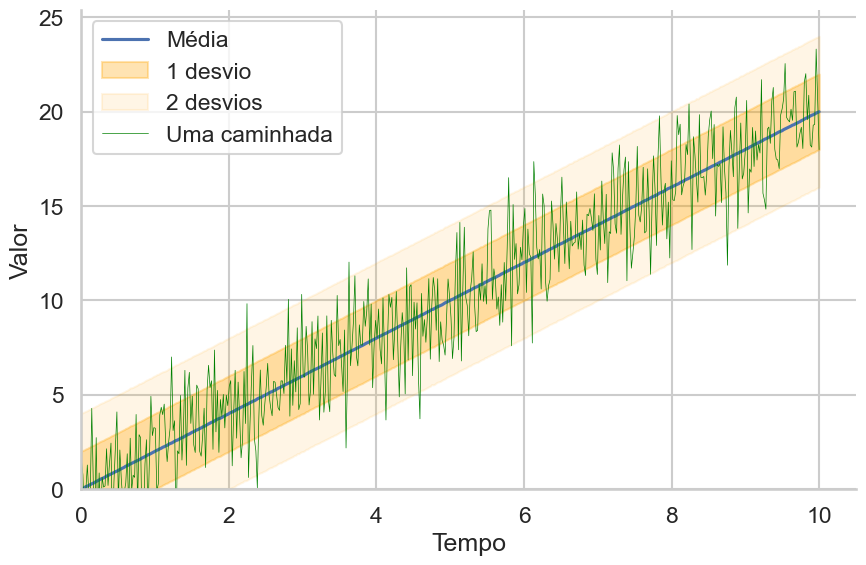

In [20]:
filename = 'estocástico_caminhada'

# Define the time horizon
t = np.linspace(0, 10, 500)

# Deterministic process: simple linear growth
y_deterministic = 2 * t 

# Stochastic process: mean and standard deviation
mean_stochastic = 2 * t
std_dev = 2  # Increased the standard deviation for visibility

# Generate multiple realizations to estimate the range
num_realizations = 100000  # Number of realizations for range estimation
realizations = []

for _ in range(num_realizations):
    noise = np.random.normal(0, std_dev, len(t))
    realizations.append(mean_stochastic + noise)

realizations = np.array(realizations)

# Generate one green "walk" to plot
single_walk = mean_stochastic + np.random.normal(0, std_dev, len(t))


# Compute the mean and confidence intervals (e.g., 1 and 2 standard deviations)
mean_realization = np.mean(realizations, axis=0)
std_realization = np.std(realizations, axis=0)

upper_bound_1std = mean_realization + std_realization
lower_bound_1std = mean_realization - std_realization
upper_bound_2std = mean_realization + 2 * std_realization
lower_bound_2std = mean_realization - 2 * std_realization

# Set Seaborn style for presentations
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(9, 6))

# Plot deterministic process
sns.lineplot(x=t, y=mean_realization, label='Média')

# Shaded region for 1 standard deviation (68% confidence interval)
plt.fill_between(t, lower_bound_1std, upper_bound_1std, color='orange', alpha=0.3, label='1 desvio')

# Shaded region for 2 standard deviations (95% confidence interval)
plt.fill_between(t, lower_bound_2std, upper_bound_2std, color='orange', alpha=0.1, label='2 desvios')

# Plot one stochastic walk in green
sns.lineplot(x=t, y=single_walk, color='green', lw=0.5, label='Uma caminhada')


# Manually add these to the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles)

plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.xlim(left=0)
plt.ylim(bottom=0)

# Remove top and right spines
sns.despine()

# Show the plots
plt.tight_layout()
plt.savefig(path + filename + '.svg', format="svg")
plt.show()



## Linear Dinamico Estocastico

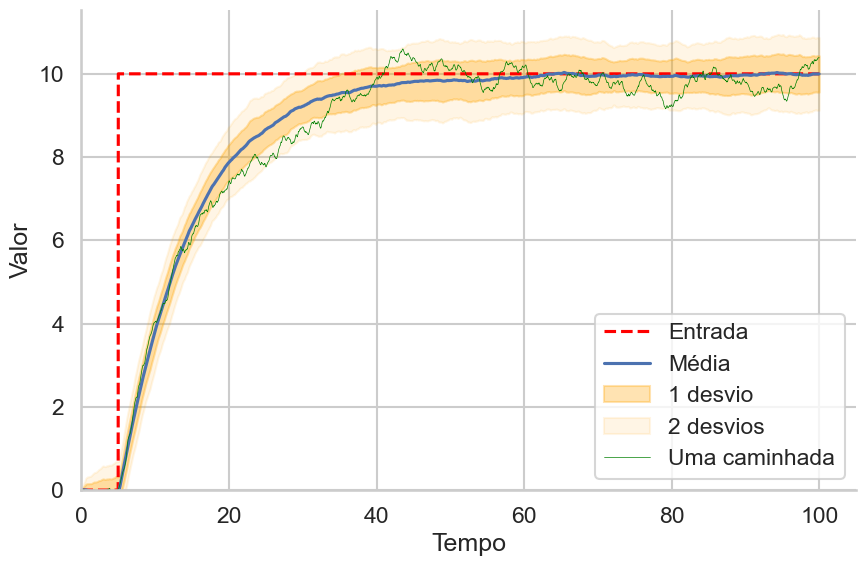

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'dinamico_segunda_ordem_estocastico'

# Define parameters
alpha = 10
beta = 1
std_dev = 2  # Standard deviation for noise
dt = 0.02  # Small time step for numerical integration
t = np.arange(0, 100, dt)

# Define the Heaviside input x(t) with amplitude 10 starting at t = 5
def x_t(t):
    return 10 * np.where(t >= 5, 1, 0)

# Define the system using the Euler-Maruyama method
def simulate_system(alpha, beta, std_dev, t, x_t):
    y1 = np.zeros_like(t)  # y(t)
    y2 = np.zeros_like(t)  # dy/dt
    for i in range(1, len(t)):
        # Deterministic part
        dy1_dt = y2[i - 1]
        dy2_dt = x_t(t[i]) - alpha * y2[i - 1] - beta * y1[i - 1]
        
        # Update y1 and y2 with Euler-Maruyama step
        y1[i] = y1[i - 1] + dy1_dt * dt
        y2[i] = y2[i - 1] + dy2_dt * dt + np.random.normal(0, std_dev * np.sqrt(dt))
    return y1

# Generate multiple realizations to estimate the range
num_realizations = 100
realizations = []

for _ in range(num_realizations):
    y1_realization = simulate_system(alpha, beta, std_dev, t, x_t)
    realizations.append(y1_realization)

realizations = np.array(realizations)

# Generate one green "walk" to plot
single_walk = simulate_system(alpha, beta, std_dev, t, x_t)

# Compute the mean and standard deviation across realizations
mean_realization = np.mean(realizations, axis=0)
std_realization = np.std(realizations, axis=0)

# Define confidence intervals
upper_bound_1std = mean_realization + std_realization
lower_bound_1std = mean_realization - std_realization
upper_bound_2std = mean_realization + 2 * std_realization
lower_bound_2std = mean_realization - 2 * std_realization

# Set Seaborn style for presentations
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(9, 6))

# Calculate the Heaviside input over the time vector
input_signal = x_t(t)

# Plot the input signal
sns.lineplot(x=t, y=input_signal, color='red', linestyle='--', label='Entrada')

# Plot mean process
sns.lineplot(x=t, y=mean_realization, label='Média')

# Shaded region for 1 standard deviation (68% confidence interval)
plt.fill_between(t, lower_bound_1std, upper_bound_1std, color='orange', alpha=0.3, label='1 desvio')

# Shaded region for 2 standard deviations (95% confidence interval)
plt.fill_between(t, lower_bound_2std, upper_bound_2std, color='orange', alpha=0.1, label='2 desvios')

# Plot one stochastic walk in green
sns.lineplot(x=t, y=single_walk, color='green', lw=0.5, label='Uma caminhada')

# Legend
plt.legend()

# Labels and axis limits
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.xlim(left=0)
plt.ylim(bottom=0)

# Remove top and right spines
sns.despine()

# Show the plots
plt.tight_layout()
plt.savefig(path+filename + '.svg', format="svg")
plt.show()


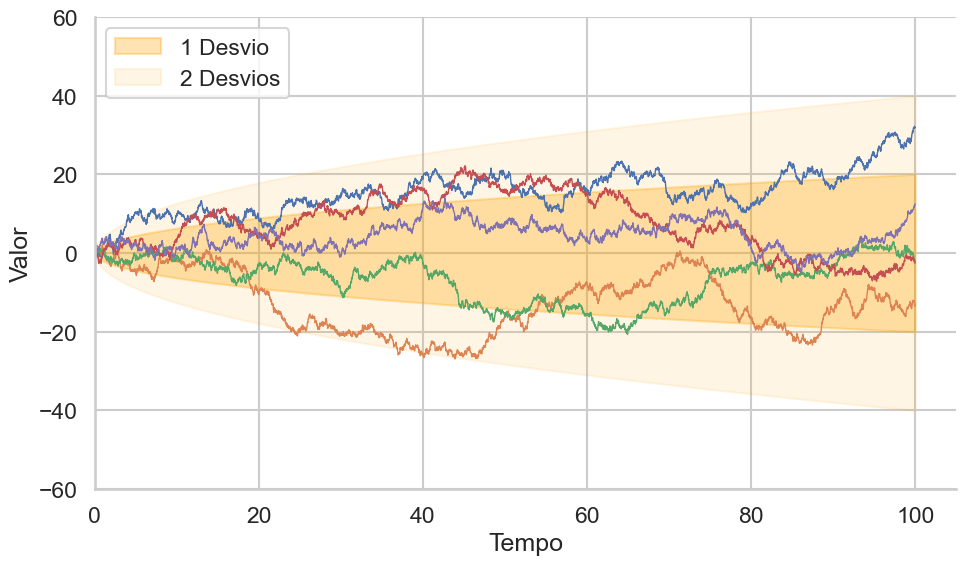

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'wiener_process_5_walks'

# Parameters for the Wiener process
std_dev = 2  # Standard deviation for noise
dt = 0.02  # Small time step for numerical integration
t = np.arange(0, 100, dt)
num_walks = 5 # Number of walks to generate

# Define the function to generate a single Wiener process walk
def wiener_walk(std_dev, t):
    # Initialize y for the Wiener process
    y = np.zeros_like(t)
    for i in range(1, len(t)):
        # Update y with the Euler-Maruyama step for the Wiener process
        y[i] = y[i - 1] + np.random.normal(0, std_dev * np.sqrt(dt))
    return y

# Set Seaborn style for presentations
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(10, 6))

# Generate multiple walks and store them
walks = np.zeros((num_walks, len(t)))

for i in range(num_walks):
    walks[i] = wiener_walk(std_dev, t)

# Calculate the mean of all walks at each time point
mean_walk = np.mean(walks, axis=0)

# Plot the individual Wiener process walks
for i in range(num_walks):
    sns.lineplot(x=t, y=walks[i], lw=1)

# Shading for expected variance region (1 standard deviation around the mean)
upper_bound = std_dev * np.sqrt(t)
lower_bound = -std_dev * np.sqrt(t)
plt.fill_between(t, lower_bound, upper_bound, color='orange', alpha=0.3, label='1 Desvio')

# Shading for expected variance region (1 standard deviation around the mean)
upper_bound = 2*std_dev * np.sqrt(t)
lower_bound = -2*std_dev * np.sqrt(t)
plt.fill_between(t, lower_bound, upper_bound, color='orange', alpha=0.1, label='2 Desvios')

# Labels and axis limits
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.xlim(left=0)
plt.ylim(bottom=-60, top=60)

# Show legend
plt.legend()

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig(path + filename + '.svg', format="svg")
plt.show()


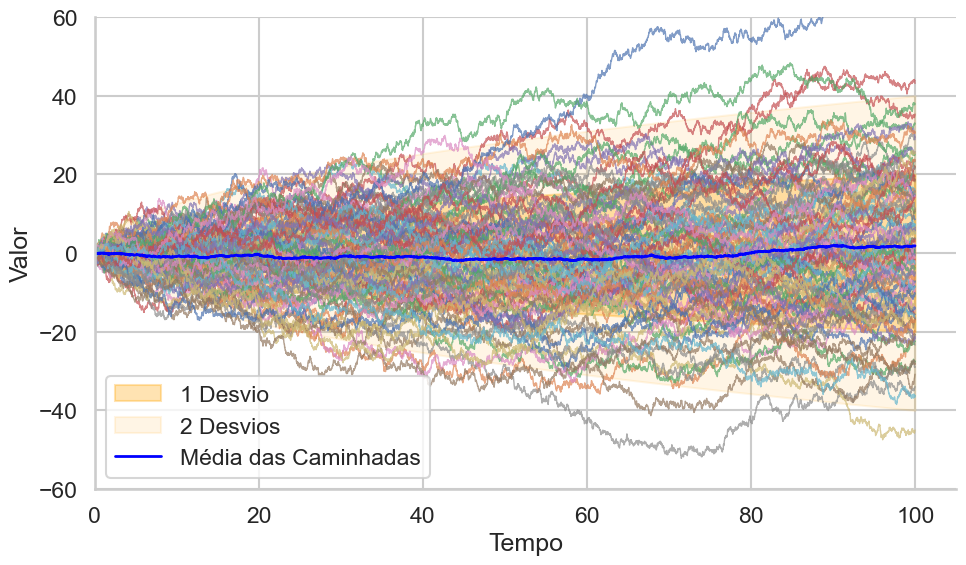

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'wiener_process_100_walks'

# Parameters for the Wiener process
std_dev = 2  # Standard deviation for noise
dt = 0.02  # Small time step for numerical integration
t = np.arange(0, 100, dt)
num_walks = 100 # Number of walks to generate

# Define the function to generate a single Wiener process walk
def wiener_walk(std_dev, t):
    # Initialize y for the Wiener process
    y = np.zeros_like(t)
    for i in range(1, len(t)):
        # Update y with the Euler-Maruyama step for the Wiener process
        y[i] = y[i - 1] + np.random.normal(0, std_dev * np.sqrt(dt))
    return y

# Set Seaborn style for presentations
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(10, 6))

# Generate multiple walks and store them
walks = np.zeros((num_walks, len(t)))

for i in range(num_walks):
    walks[i] = wiener_walk(std_dev, t)

# Calculate the mean of all walks at each time point
mean_walk = np.mean(walks, axis=0)

# Plot the individual Wiener process walks
for i in range(num_walks):
    sns.lineplot(x=t, y=walks[i], lw=1, alpha=0.7)

# Shading for expected variance region (1 standard deviation around the mean)
upper_bound = std_dev * np.sqrt(t)
lower_bound = -std_dev * np.sqrt(t)
plt.fill_between(t, lower_bound, upper_bound, color='orange', alpha=0.3, label='1 Desvio')

# Shading for expected variance region (1 standard deviation around the mean)
upper_bound = 2*std_dev * np.sqrt(t)
lower_bound = -2*std_dev * np.sqrt(t)
plt.fill_between(t, lower_bound, upper_bound, color='orange', alpha=0.1, label='2 Desvios')

# Plot the mean of the walks
sns.lineplot(x=t, y=mean_walk, color='blue', lw=2, label='Média das Caminhadas')

# Labels and axis limits
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.xlim(left=0)
plt.ylim(bottom=-60, top=60)

# Show legend
plt.legend()

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig(path + filename + '.svg', format="svg")
plt.show()


## Linear Dinâmico

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

filename = 'lin_din'

# Define the time horizon
t = np.linspace(0, 100, 500)

def x_t2(t):
    return 2*np.log(t+1)  # Degrau unitário: x(t) = 1 para t >= 0

# Definir o sistema de equações diferenciais
def system2(y, t, beta):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = x_t2(t) - beta * y2 - alpha * y1
    return [dy1_dt, dy2_dt]

# Define the new input functions with t^3 instead of exp(t)
# Parâmetro beta (aumentado para gerar resposta amortecida)
beta = 0.15  # Valor maior para garantir amortecimento
alpha = 0.5

# Condições iniciais
y0 = [0, 0]  # y(0) = 0, dy/dt(0) = 0

# Resolver a equação diferencial
sol2 = odeint(system2, y0, t, args=(beta,))

# Extraindo a solução y(t)

y_t2 = sol2[:, 0]

# Set Seaborn style for presentations
sns.set_theme(style="whitegrid", context="talk")

def plota(t,y1,y2,label1,label2,name,yt,yb,xr):

    # Create the plot
    plt.figure(figsize=(9, 6))

    # Plot deterministic process
    sns.lineplot(x=t, y=y1, label=label1)
    sns.lineplot(x=t, y=y2, label=label2)

    # Manually add these to the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles)

    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.xlim(left=0)
    plt.xlim(right=xr)
    plt.ylim(bottom=yb)
    plt.ylim(top=yt)

    # Remove top and right spines
    sns.despine()

    # Show the plots
    plt.tight_layout()
    plt.savefig(path + filename + '_' + name + '.svg', format="svg")
    plt.show()

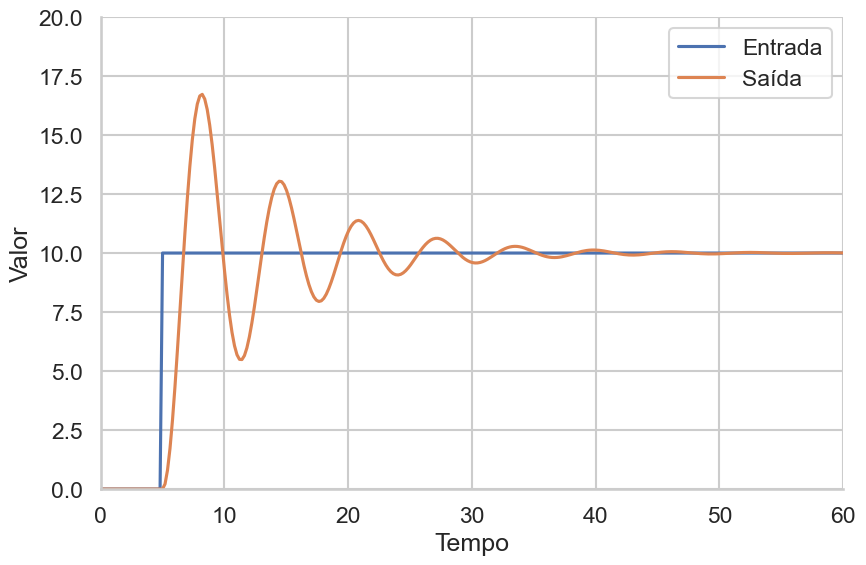

In [6]:
def x_t1(t):
    return 10*np.where(t >= 5, 1, 0)  # Degrau unitário: x(t) = 1 para t >= 5

# Definir o sistema de equações diferenciais
def system1(y, t, beta):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = x_t1(t) - beta * y1 - alpha * y2
    return [dy1_dt, dy2_dt]

# Parâmetro beta (aumentado para gerar resposta amortecida)
beta = 1  # Valor maior para garantir amortecimento
alpha = 0.25

# Condições iniciais
y0 = [0, 0]  # y(0) = 0, dy/dt(0) = 0

# Resolver a equação diferencial
sol1 = odeint(system1, y0, t, args=(beta,))
y_t1 = sol1[:, 0]

label1 = 'Entrada'
label2 = 'Saída'

y1 = x_t1(t)
y2 = y_t1
name = 'degrau_subamortecido'
yt = 40
yb = 0

plota(t,y1,y2,label1,label2,name,20,0,60)

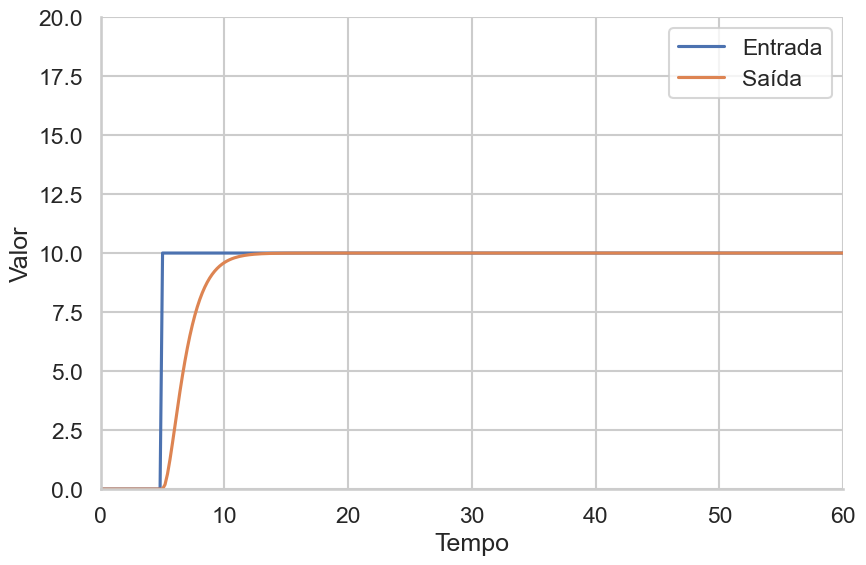

In [7]:
def x_t1(t):
    return 10*np.where(t >= 5, 1, 0)  # Degrau unitário: x(t) = 1 para t >= 5

# Definir o sistema de equações diferenciais
def system1(y, t, beta):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = x_t1(t) - beta * y1 - alpha * y2
    return [dy1_dt, dy2_dt]

# Parâmetro beta (aumentado para gerar resposta amortecida)
beta = 1  # Valor maior para garantir amortecimento
alpha = 2

# Condições iniciais
y0 = [0, 0]  # y(0) = 0, dy/dt(0) = 0

# Resolver a equação diferencial
sol1 = odeint(system1, y0, t, args=(beta,))
y_t1 = sol1[:, 0]

label1 = 'Entrada'
label2 = 'Saída'

y1 = x_t1(t)
y2 = y_t1
name = 'degrau_criticamente'
yt = 40
yb = 0

plota(t,y1,y2,label1,label2,name,20,0,60)

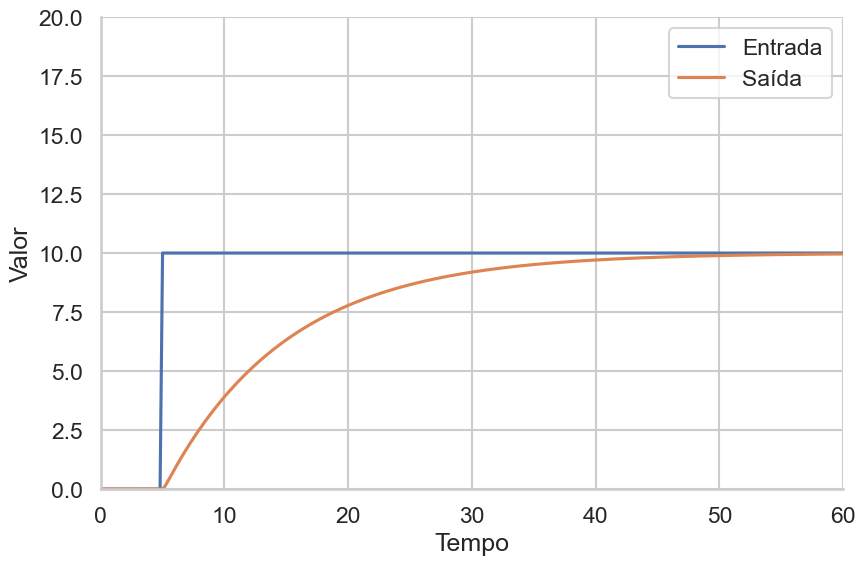

In [11]:
def x_t1(t):
    return 10*np.where(t >= 5, 1, 0)  # Degrau unitário: x(t) = 1 para t >= 5

# Definir o sistema de equações diferenciais
def system1(y, t, beta):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = x_t1(t) - beta * y1 - alpha * y2
    return [dy1_dt, dy2_dt]

# Parâmetro beta (aumentado para gerar resposta amortecida)
beta = 1  # Valor maior para garantir amortecimento
alpha = 10

# Condições iniciais
y0 = [0, 0]  # y(0) = 0, dy/dt(0) = 0

# Resolver a equação diferencial
sol1 = odeint(system1, y0, t, args=(beta,))
y_t1 = sol1[:, 0]

label1 = 'Entrada'
label2 = 'Saída'

y1 = x_t1(t)
y2 = y_t1
name = 'degrau_super'
yt = 40
yb = 0

plota(t,y1,y2,label1,label2,name,20,0,60)

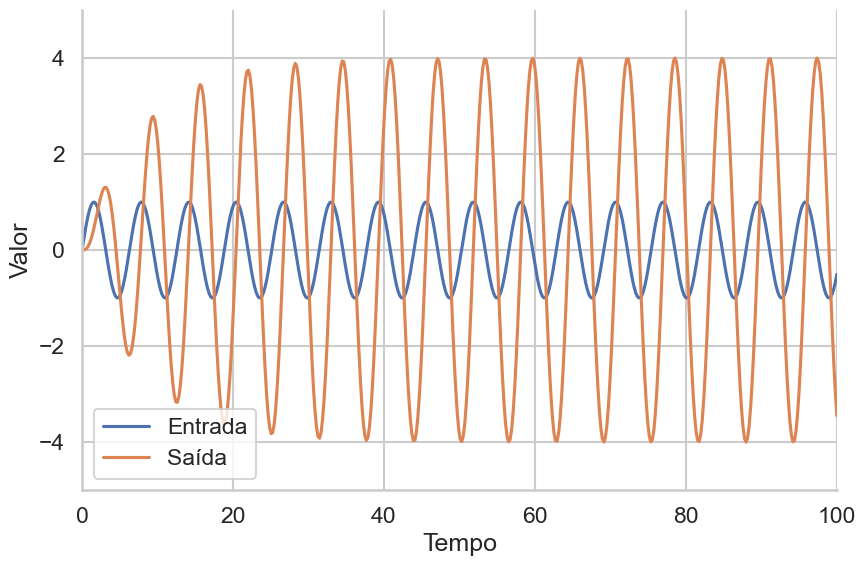

In [32]:
def x_t1(t):
    return np.sin(t)  # Degrau unitário: x(t) = 1 para t >= 5

# Definir o sistema de equações diferenciais
def system1(y, t, beta):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = x_t1(t) - beta * y1 - alpha * y2
    return [dy1_dt, dy2_dt]

# Parâmetro beta (aumentado para gerar resposta amortecida)
beta = 1  # Valor maior para garantir amortecimento
alpha = 0.25

# Condições iniciais
y0 = [0, 0]  # y(0) = 0, dy/dt(0) = 0

# Resolver a equação diferencial
sol1 = odeint(system1, y0, t, args=(beta,))
y_t1 = sol1[:, 0]

label1 = 'Entrada'
label2 = 'Saída'

y1 = x_t1(t)
y2 = y_t1
name = 'seno_subamortecido'
yt = 5
yb = -5

plota(t,y1,y2,label1,label2,name,yt,yb,100)